<a href="https://colab.research.google.com/github/yassmin1/Coffee_Lovers/blob/main/coffee_review_sentiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of the Coffee Reviews 

I applied three main libraries: 
* TextBolb
* VADER
* SentiWordNet

**TextBlob returns polarity and subjectivity of a sentence**:    
Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Negation words reverse the polarity.    
Subjectivity lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.    
intensity. TextBlob calculates subjectivity by looking at the ‘intensity’. Intensity determines if a word modifies the next word. For English, adverbs are used as modifiers (‘very good’).   

**Sentiment Analysis using VADER**   
VADER stands for Valence Aware Dictionary and Sentiment Reasoner. Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

**Sentiment Analysis using SentiWordNet**   

SentiWordNet uses the WordNet database. It is important to obtain the POS, lemma of each word. We will then use the lemma, POS to obtain the synonym sets(synsets). We then obtain the positive, negative, objective scores for all the possible synsets or the very first synset and label the text.

if positive score > negative score, the sentiment is positive
if positive score < negative score, the sentiment is negative
if positive score = negative score, the sentiment is neutral

In [1]:

# libraries 
import pandas as pd 
import json
import seaborn as sns
import textblob
import re 
import matplotlib.pyplot as plt
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [2]:
# Creating a pandas dataframe from review amazon json  file
inputfiles="C:/Users/ryass.DESKTOP-0A1NS33/OneDrive/practice_python/scrap_data/amazon/amazon.json"
inputgithub=r"https://raw.githubusercontent.com/yassmin1/Coffee_Lovers/main/amazon.json"
#with open(inputgithub) as f:
#    data_json = json.load(f)


#data = pd.DataFrame(data_json)
data = pd.read_json(inputgithub)
data.head(2)



,product,name,name_link,location,date,stars,title,review
0,B00L3N4ZR2,Dick,/gp/profile/amzn1.account.AHBKNO5GHMDEHLMYHHUL...,the United States,2018-08-24,5,Truly good quality coffee rediscovered!,The title says it all; “Truly good quality cof...
1,B00L3N4ZR2,Mr Sniggleswerth,/gp/profile/amzn1.account.AGNW7B235FLA3XVEHRMS...,the United States,2019-05-08,5,Human Termite!,This product is amazing! It fires me up so muc...


In [3]:
# extracting only the rates and title and reviews 
mydata = data.loc[:,['stars','title','review']]
mydata.head(2)

,stars,title,review
0,5,Truly good quality coffee rediscovered!,The title says it all; “Truly good quality cof...
1,5,Human Termite!,This product is amazing! It fires me up so muc...


In [4]:
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text.lower()

# Cleaning the text in the review column
mydata['Cleaned Reviews'] = mydata['title'].apply(clean)
mydata.head()

,stars,title,review,Cleaned Reviews
0,5,Truly good quality coffee rediscovered!,The title says it all; “Truly good quality cof...,truly good quality coffee rediscovered
1,5,Human Termite!,This product is amazing! It fires me up so muc...,human termite
2,5,"very good for espresso, highly recommend",I have been using this since I bought my revil...,very good for espresso highly recommend
3,5,This Gran Crema Espresso Is The Best coffee th...,I use the Harrio brewing method for my morning...,this gran crema espresso is the best coffee th...
4,1,Get ready for a blast from the past! Is this T...,"Lavazza coffee is usually incredible, fresh an...",get ready for a blast from the past is this tw...


In [5]:
# cleaning stop words 
import nltk
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

mydata['POS tagged'] = mydata['Cleaned Reviews'].apply(token_stop_pos)
mydata.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,stars,title,review,Cleaned Reviews,POS tagged
0,5,Truly good quality coffee rediscovered!,The title says it all; “Truly good quality cof...,truly good quality coffee rediscovered,"[(truly, r), (good, a), (quality, n), (coffee,..."
1,5,Human Termite!,This product is amazing! It fires me up so muc...,human termite,"[(human, a), (termite, n)]"
2,5,"very good for espresso, highly recommend",I have been using this since I bought my revil...,very good for espresso highly recommend,"[(good, a), (espresso, a), (highly, r), (recom..."
3,5,This Gran Crema Espresso Is The Best coffee th...,I use the Harrio brewing method for my morning...,this gran crema espresso is the best coffee th...,"[(gran, n), (crema, n), (espresso, n), (best, ..."
4,1,Get ready for a blast from the past! Is this T...,"Lavazza coffee is usually incredible, fresh an...",get ready for a blast from the past is this tw...,"[(get, v), (ready, a), (blast, n), (past, n), ..."


In [6]:
# finding the root of the words
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

mydata['Lemma'] = mydata['POS tagged'].apply(lemmatize)
mydata.head()

,stars,title,review,Cleaned Reviews,POS tagged,Lemma
0,5,Truly good quality coffee rediscovered!,The title says it all; “Truly good quality cof...,truly good quality coffee rediscovered,"[(truly, r), (good, a), (quality, n), (coffee,...",truly good quality coffee rediscover
1,5,Human Termite!,This product is amazing! It fires me up so muc...,human termite,"[(human, a), (termite, n)]",human termite
2,5,"very good for espresso, highly recommend",I have been using this since I bought my revil...,very good for espresso highly recommend,"[(good, a), (espresso, a), (highly, r), (recom...",good espresso highly recommend
3,5,This Gran Crema Espresso Is The Best coffee th...,I use the Harrio brewing method for my morning...,this gran crema espresso is the best coffee th...,"[(gran, n), (crema, n), (espresso, n), (best, ...",gran crema espresso best coffee year
4,1,Get ready for a blast from the past! Is this T...,"Lavazza coffee is usually incredible, fresh an...",get ready for a blast from the past is this tw...,"[(get, v), (ready, a), (blast, n), (past, n), ...",get ready blast past twilight zone


In [7]:
# TextBlob aims to provide access to common text-processing operations through a familiar interface.
# You can treat TextBlob objects as if they were Python strings that learned how to do Natural
# Language Processing.

from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [8]:
fin_data = pd.DataFrame(mydata[['stars','review', 'Lemma']])
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,stars,review,Lemma,Polarity,Analysis
0,5,The title says it all; “Truly good quality cof...,truly good quality coffee rediscover,0.700,Positive
1,5,This product is amazing! It fires me up so muc...,human termite,0.000,Neutral
2,5,I have been using this since I bought my revil...,good espresso highly recommend,0.430,Positive
3,5,I use the Harrio brewing method for my morning...,gran crema espresso best coffee year,1.000,Positive
4,1,"Lavazza coffee is usually incredible, fresh an...",get ready blast past twilight zone,-0.025,Negative


In [9]:
tb_counts = fin_data.Analysis.value_counts()

tb_counts

Positive    10
Neutral     10
Negative     4
Name: Analysis, dtype: int64

# Sentiment Analysis using VADER


In [10]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.9 MB/s 


,stars,review,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,5,The title says it all; “Truly good quality cof...,truly good quality coffee rediscover,0.700,Positive,0.7003,Positive
1,5,This product is amazing! It fires me up so muc...,human termite,0.000,Neutral,0.0000,Neutral
2,5,I have been using this since I bought my revil...,good espresso highly recommend,0.430,Positive,0.6901,Positive
3,5,I use the Harrio brewing method for my morning...,gran crema espresso best coffee year,1.000,Positive,0.6369,Positive
4,1,"Lavazza coffee is usually incredible, fresh an...",get ready blast past twilight zone,-0.025,Negative,0.3612,Neutral


In [11]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Neutral     17
Positive     6
Negative     1
Name: Vader Analysis, dtype: int64

# Sentiment Analysis using SentiWordNet


In [12]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn
def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue
            # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
        if not tokens_count:
            return 0
        if sentiment>0:
            return "Positive",sentiment
        if sentiment==0:
            return "Neutral",sentiment
        else:
            return "Negative" ,sentiment

fin_data['SWN Sentiment']=mydata['POS tagged'].apply(sentiwordnetanalysis).str[1]

fin_data['SWN Analysis'] = mydata['POS tagged'].apply(sentiwordnetanalysis).str[0]
fin_data.head()


[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


,stars,review,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN Sentiment,SWN Analysis
0,5,The title says it all; “Truly good quality cof...,truly good quality coffee rediscover,0.700,Positive,0.7003,Positive,0.625,Positive
1,5,This product is amazing! It fires me up so muc...,human termite,0.000,Neutral,0.0000,Neutral,0.000,Neutral
2,5,I have been using this since I bought my revil...,good espresso highly recommend,0.430,Positive,0.6901,Positive,0.750,Positive
3,5,I use the Harrio brewing method for my morning...,gran crema espresso best coffee year,1.000,Positive,0.6369,Positive,0.000,Neutral
4,1,"Lavazza coffee is usually incredible, fresh an...",get ready blast past twilight zone,-0.025,Negative,0.3612,Neutral,0.125,Positive


In [13]:
swn_counts= fin_data['SWN Analysis'].value_counts()
swn_counts

Neutral     14
Positive     7
Negative     3
Name: SWN Analysis, dtype: int64

In [14]:
pd.concat((tb_counts,vader_counts,swn_counts),axis=1)

,Analysis,Vader Analysis,SWN Analysis
Positive,10,6,7
Neutral,10,17,14
Negative,4,1,3


([<matplotlib.patches.Wedge at 0x7f37225eb910>,
 [Text(-0.8541026498780108, 3.187555280065173, 'Neutral'),
  Text(-0.4307369448678844, -3.2717679753194426, 'Positive'),
  Text(3.279772086026208, -1.3585267990449432, 'Negative')],
 [Text(-0.46587417266073305, 1.738666516399185, '58.3%'),
  Text(-0.23494742447339143, -1.7846007138106046, '29.2%'),
  Text(1.8939528947475281, -0.7845013909977839, '12.5%')])

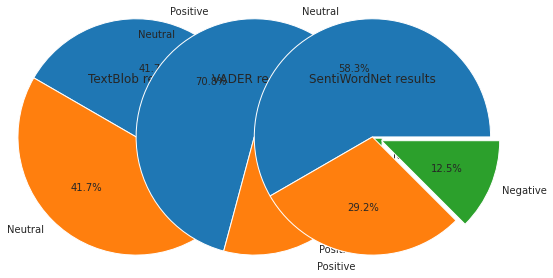

In [15]:
fig,ax=plt.subplots(1,3,clear=True)
ax[0].set_title("TextBlob results")
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[2].set_aspect('equal')
ax[0].pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False,radius=3)
ax[1].set_title("VADER results")
ax[1].pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False,radius=3)
ax[2].set_title("SentiWordNet results")
ax[2].pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False,radius=3)

In [ ]:
sns.heatmap(fin_data[['SWN Sentiment','Polarity','Vader Sentiment','Average Sentiment']].corr(),cmap="YlGnBu", annot=True, cbar=False)

In [22]:
    def sentiment_to_analysis(sentiment):    

        if sentiment>0:
            return "Positive"
        if sentiment==0:
            return "Neutral"
        else:
            return "Negative" 

In [23]:
fin_data['Average Sentiment']=fin_data[['SWN Sentiment','Polarity','Vader Sentiment']].mean(axis=1)
fin_data['Average Anlysis']=fin_data['Average Sentiment'].apply(sentiment_to_analysis)

In [92]:
#fin_data['standard stars']=fin_data['stars'].apply(lambda x:(x-fin_data['stars'].mean())/fin_data['stars'].std())
fin_data['standard stars']=fin_data['stars'].apply(lambda x:(x-2.5)/fin_data['stars'].std()).round(4)

In [93]:
melt_Sentiment=fin_data[['SWN Sentiment','Polarity','Vader Sentiment','Average Sentiment','standard stars']].melt(id_vars='standard stars')

In [94]:
melt_Sentiment

,standard stars,variable,value
0,1.4369,SWN Sentiment,0.625000
1,1.4369,SWN Sentiment,0.000000
2,1.4369,SWN Sentiment,0.750000
3,1.4369,SWN Sentiment,0.000000
4,-0.8621,SWN Sentiment,0.125000
...,...,...,...
91,-0.8621,Average Sentiment,0.000000
92,0.8621,Average Sentiment,0.212604
93,-0.8621,Average Sentiment,0.000000
94,0.2874,Average Sentiment,0.001000


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

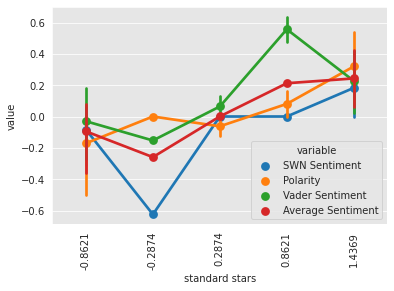

In [95]:

sns.pointplot(data=melt_Sentiment,x='standard stars',y='value',hue='variable')
plt.xticks(rotation=90)

In [ ]:
#sns.countplot(data=fin_data,x='stars',hue='SWN Analysis',hue_order=['Positive','Neutral','Negative'],order=['1.0','2.0','3.0','4.0','5.0'])

In [96]:
fin_data.head()

,stars,review,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN Sentiment,SWN Analysis,Average Sentiment,Average Anlysis,standard stars
0,5,The title says it all; “Truly good quality cof...,truly good quality coffee rediscover,0.700,Positive,0.7003,Positive,0.625,Positive,0.675100,Positive,1.4369
1,5,This product is amazing! It fires me up so muc...,human termite,0.000,Neutral,0.0000,Neutral,0.000,Neutral,0.000000,Neutral,1.4369
2,5,I have been using this since I bought my revil...,good espresso highly recommend,0.430,Positive,0.6901,Positive,0.750,Positive,0.623367,Positive,1.4369
3,5,I use the Harrio brewing method for my morning...,gran crema espresso best coffee year,1.000,Positive,0.6369,Positive,0.000,Neutral,0.545633,Positive,1.4369
4,1,"Lavazza coffee is usually incredible, fresh an...",get ready blast past twilight zone,-0.025,Negative,0.3612,Neutral,0.125,Positive,0.153733,Positive,-0.8621
